#Etapa 1: Exploración de los datos

In [ ]:
# =============================================================================
# BLOQUE 1: CARGA Y PREPROCESAMIENTO DE DATOS
# =============================================================================

# Cargar el Dataset
import pandas as pd
df = pd.read_csv('/content/Datos_Energeticos_Ecuador_2014_2024.csv',
                 encoding='latin-1',
                 sep=';',
                 decimal=',')



In [ ]:
df.head()
# Ver las primeras filas:

,Anio,Mes,Empresa,Grupo Consumo,Provincia,Canton,Parroquia,Numero Clientes,Energia Facturada (kWh),Facturacion Servicio Electrico (USD),PIB %,Inflacion %
0,2014,Feb,CNEL-Guayas Los Ríos,Comercial,COTOPAXI,LA MANÁ,EL CARMEN,1,3974,321.640741,4.226065,NaN
1,2014,Feb,CNEL-Guayas Los Ríos,Comercial,COTOPAXI,LA MANÁ,LA MANÁ,5,18785,911.546281,4.226065,NaN
2,2014,Feb,CNEL-Guayas Los Ríos,Industrial,COTOPAXI,LA MANÁ,LA MANÁ,1,46145,1918.908433,4.226065,NaN
3,2014,Feb,CNEL-Guayas Los Ríos,Residencial,COTOPAXI,LA MANÁ,LA MANÁ,2,1334342,79.125341,4.226065,NaN
4,2014,Feb,CNEL-Guayas Los Ríos,Otros,COTOPAXI,LA MANÁ,EL TRIUNFO,1,0,0.000000,4.226065,NaN


In [ ]:
#Cambiar de nombre a las filas:
df.rename(columns={
    'Anio': 'Año',
    'Mes': 'Mes',
    'Empresa': 'Empresa',
    'Grupo Consumo': 'Grupo_Consumo',
    'Provincia': 'Provincia',
    'Canton': 'Canton',
    'Parroquia': 'Parroquia',
    'Numero Clientes': 'Clientes',
    'Energia Facturada (kWh)': 'Energia_kWh',
    'Facturacion Servicio Electrico (USD)': 'Facturacion_USD',
    'PIB %': 'PIB',
    'Inflacion %': 'Inflacion'
}, inplace=True)


In [ ]:
df.head()
#Ver las primeras filas:

,Año,Mes,Empresa,Grupo_Consumo,Provincia,Canton,Parroquia,Clientes,Energia_kWh,Facturacion_USD,PIB,Inflacion
0,2014,Feb,CNEL-Guayas Los Ríos,Comercial,COTOPAXI,LA MANÁ,EL CARMEN,1,3974,321.640741,4.226065,NaN
1,2014,Feb,CNEL-Guayas Los Ríos,Comercial,COTOPAXI,LA MANÁ,LA MANÁ,5,18785,911.546281,4.226065,NaN
2,2014,Feb,CNEL-Guayas Los Ríos,Industrial,COTOPAXI,LA MANÁ,LA MANÁ,1,46145,1918.908433,4.226065,NaN
3,2014,Feb,CNEL-Guayas Los Ríos,Residencial,COTOPAXI,LA MANÁ,LA MANÁ,2,1334342,79.125341,4.226065,NaN
4,2014,Feb,CNEL-Guayas Los Ríos,Otros,COTOPAXI,LA MANÁ,EL TRIUNFO,1,0,0.000000,4.226065,NaN


In [ ]:
df.info()
#Ver la información general del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637390 entries, 0 to 637389
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Año              637390 non-null  int64  
 1   Mes              637390 non-null  object 
 2   Empresa          637390 non-null  object 
 3   Grupo_Consumo    637390 non-null  object 
 4   Provincia        637390 non-null  object 
 5   Canton           637390 non-null  object 
 6   Parroquia        637390 non-null  object 
 7   Clientes         637390 non-null  int64  
 8   Energia_kWh      637390 non-null  int64  
 9   Facturacion_USD  637390 non-null  float64
 10  PIB              577321 non-null  float64
 11  Inflacion        522943 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 58.4+ MB


In [ ]:
df.describe()
#Estadísticas descriptivas para las columnas numéricas:

,Año,Clientes,Energia_kWh,Facturacion_USD,PIB,Inflacion
count,637390.000000,637390.000000,6.373900e+05,6.373900e+05,577321.000000,522943.000000
mean,2019.105882,1072.900271,3.542620e+05,3.320574e+04,2.005809,1.275759
std,3.147039,7205.059654,2.456708e+06,2.175923e+05,4.948362,1.521214
min,2014.000000,0.000000,-9.666283e+07,-6.988578e+06,-9.245096,-0.340000
25%,2016.000000,12.000000,3.615000e+03,3.247100e+02,0.119692,0.130000
50%,2019.000000,50.000000,2.532900e+04,2.551070e+03,2.355218,0.420000
75%,2022.000000,418.000000,1.434920e+05,1.403964e+04,5.970399,2.200000
max,2024.000000,708455.000000,1.401134e+08,1.045552e+07,9.818418,3.970000


In [ ]:
df.isnull().sum()
#Revisar valores nulos:

,0
Año,0
Mes,0
Empresa,0
Grupo_Consumo,0
Provincia,0
Canton,0
Parroquia,0
Clientes,0
Energia_kWh,0
Facturacion_USD,0


In [ ]:
df.duplicated().sum()
#Revisar si hay valores duplicados:

np.int64(0)

In [ ]:
# Crear columna de fecha a partir de Año y Mes con nombres abreviados

# Diccionario para convertir nombres de meses a números
meses_dict = {
    'Ene': '01', 'Feb': '02', 'Mar': '03', 'Abr': '04',
    'May': '05', 'Jun': '06', 'Jul': '07', 'Ago': '08',
    'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dic': '12'
}

# Convertir los nombres de mes a número
df['Mes_Num'] = df['Mes'].map(meses_dict)

# Crear columna de fecha en formato datetime
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes_Num'], format='%Y-%m')

# Verificar que la columna fue creada correctamente
df[['Año', 'Mes', 'Mes_Num', 'Fecha']].head()


,Año,Mes,Mes_Num,Fecha
0,2014,Feb,02,2014-02-01
1,2014,Feb,02,2014-02-01
2,2014,Feb,02,2014-02-01
3,2014,Feb,02,2014-02-01
4,2014,Feb,02,2014-02-01


## Graficacion

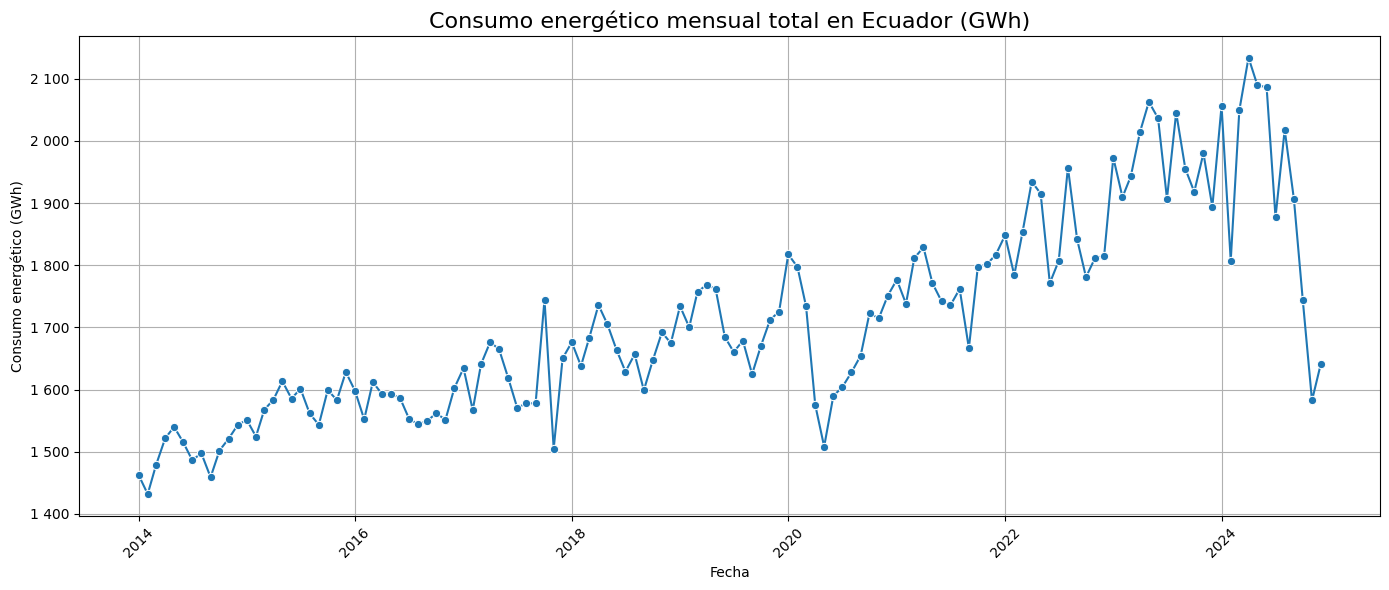

In [ ]:
#Visualización del consumo energético mensual total


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Crear columna en GWh
df['Energia_GWh'] = df['Energia_kWh'] / 1_000_000  # 1 GWh = 1,000,000 kWh

# Agrupar por mes
df_mensual = df.groupby('Fecha')['Energia_GWh'].sum().reset_index()

# Graficar
plt.figure(figsize=(14,6))
sns.lineplot(data=df_mensual, x='Fecha', y='Energia_GWh', marker='o')

plt.title('Consumo energético mensual total en Ecuador (GWh)', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Consumo energético (GWh)')
plt.xticks(rotation=45)

# Función personalizada para usar espacio como separador de miles
espaciador = ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' '))

# Aplicar en el eje Y
plt.gca().yaxis.set_major_formatter(espaciador)

plt.grid(True)
plt.tight_layout()

# Guardar la nueva imagen
plt.savefig('consumo_mensual_total_gwh.png', dpi=300)

# Mostrar gráfico
plt.show()


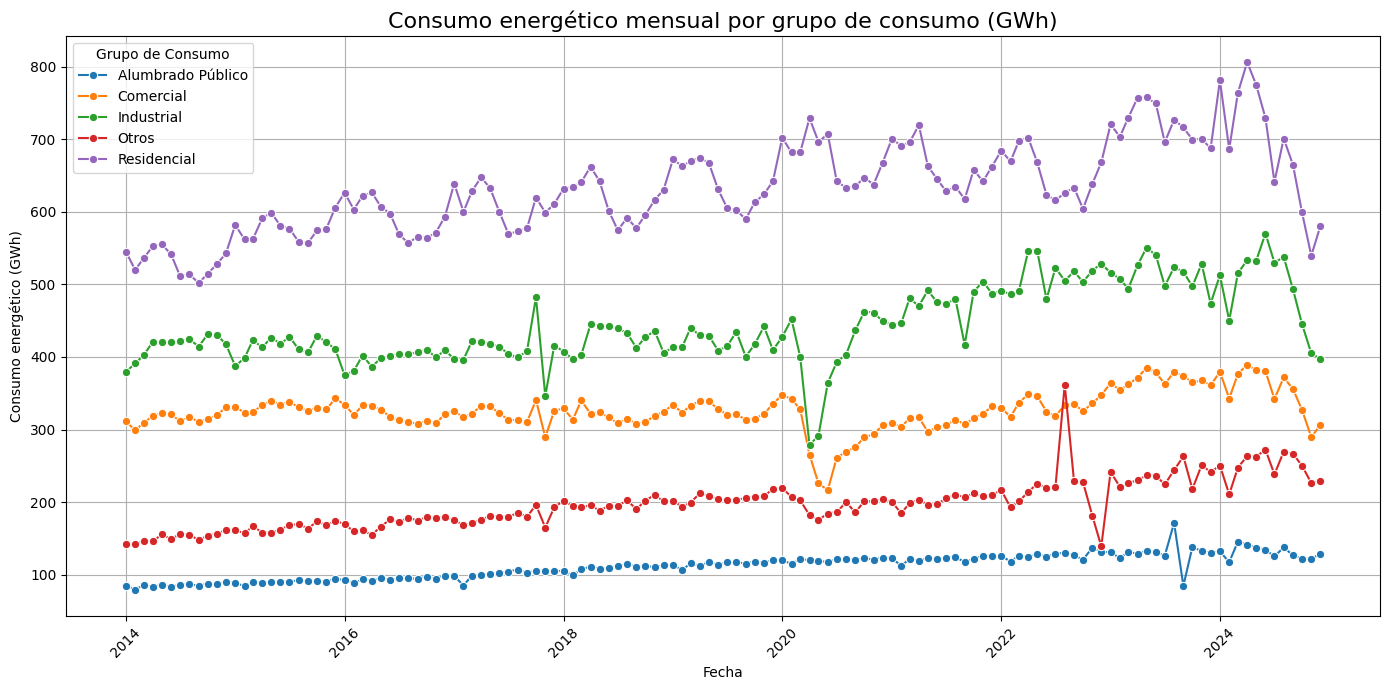

In [ ]:
#Consumo mensual por grupo de consumo (residencial, industrial, etc.)

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Convertir a GWh
df['Energia_GWh'] = df['Energia_kWh'] / 1_000_000  # 1 GWh = 1,000,000 kWh

# Agrupar por fecha y grupo de consumo
df_grupo = df.groupby(['Fecha', 'Grupo_Consumo'])['Energia_GWh'].sum().reset_index()

# Graficar
plt.figure(figsize=(14,7))
sns.lineplot(data=df_grupo, x='Fecha', y='Energia_GWh', hue='Grupo_Consumo', marker='o')

plt.title('Consumo energético mensual por grupo de consumo (GWh)', fontsize=16)
plt.xlabel('Fecha')
plt.ylabel('Consumo energético (GWh)')
plt.xticks(rotation=45)

# Función personalizada para usar espacio como separador de miles
espaciador = ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' '))

# Aplicar en el eje Y
plt.gca().yaxis.set_major_formatter(espaciador)


plt.legend(title='Grupo de Consumo')
plt.grid(True)
plt.tight_layout()

# Guardar imagen
plt.savefig('consumo_por_grupo_gwh.png', dpi=300)

# Mostrar gráfico
plt.show()


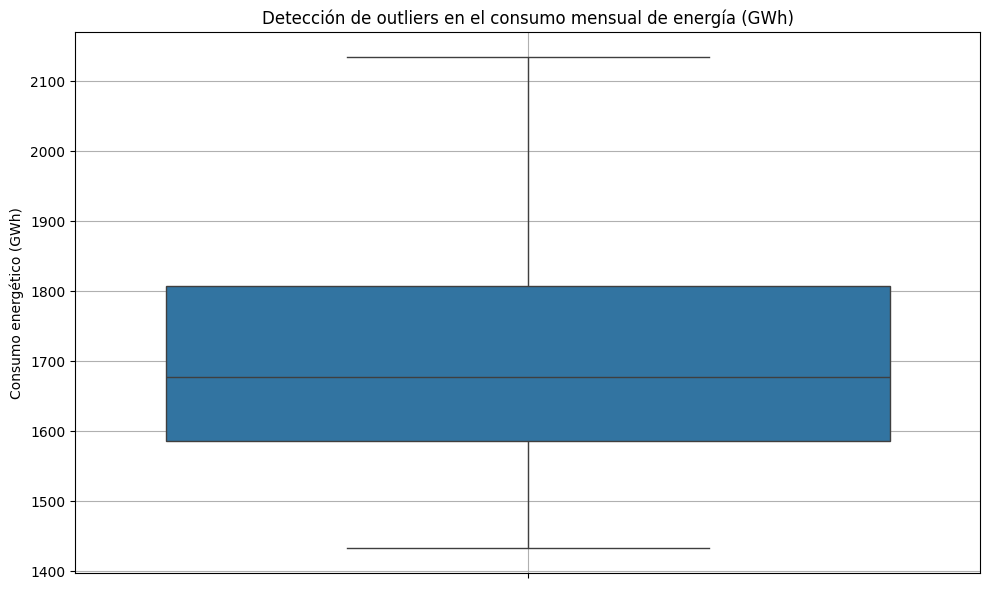

In [ ]:
#Detección de outliers (boxplot o z-score)
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar consumo total por mes
df_mensual = df.groupby('Fecha')['Energia_GWh'].sum().reset_index()

# Gráfico de caja
plt.figure(figsize=(10,6))
sns.boxplot(y=df_mensual['Energia_GWh'])

plt.title('Detección de outliers en el consumo mensual de energía (GWh)')
plt.ylabel('Consumo energético (GWh)')
plt.grid(True)
plt.tight_layout()

# Guardar imagen
plt.savefig('deteccion_de_outliers.png', dpi=300)

# Mostrar gráfico
plt.show()


#Etapa 2: Preprocesamiento y estructuración del Dataset

In [ ]:
#Conversión de tipos de datos, Añadir la Fecha como datetime64

# Verificar tipos de datos
print(df.dtypes)


Año                         int64
Mes                        object
Empresa                    object
Grupo_Consumo              object
Provincia                  object
Canton                     object
Parroquia                  object
Clientes                    int64
Energia_kWh                 int64
Facturacion_USD           float64
PIB                       float64
Inflacion                 float64
Mes_Num                    object
Fecha              datetime64[ns]
dtype: object


In [ ]:
#Conversión de kWh a GWh

# Crear nueva columna con valores en GWh
df['Energia_GWh'] = df['Energia_kWh'] / 1_000_000

# Mostrar las primeras filas para verificar
df[['Energia_kWh', 'Energia_GWh']].head()


,Energia_kWh,Energia_GWh
0,3974,0.003974
1,18785,0.018785
2,46145,0.046145
3,1334342,1.334342
4,0,0.000000


In [ ]:
#Detección y tratamiento de datos nulos

# Ver cuántos valores nulos hay por columna
df.isnull().sum()

,0
Año,0
Mes,0
Empresa,0
Grupo_Consumo,0
Provincia,0
Canton,0
Parroquia,0
Clientes,0
Energia_kWh,0
Facturacion_USD,0


In [ ]:
#Agregar los valores faltantes

df.loc[df['Año'] == 2024, 'PIB'] = -2.0
df.loc[df['Año'] == 2014, 'Inflacion'] = 3.67
df.loc[df['Año'] == 2024, 'Inflacion'] = 0.53


In [ ]:
#Comprobamos valores nulos hay por columna
df.isnull().sum()

,0
Año,0
Mes,0
Empresa,0
Grupo_Consumo,0
Provincia,0
Canton,0
Parroquia,0
Clientes,0
Energia_kWh,0
Facturacion_USD,0


In [ ]:
#Eliminación de columnas irrelevantes o redundantes
# Mostrar columnas actuales
print(df.columns.tolist())


['Año', 'Mes', 'Empresa', 'Grupo_Consumo', 'Provincia', 'Canton', 'Parroquia', 'Clientes', 'Energia_kWh', 'Facturacion_USD', 'PIB', 'Inflacion', 'Mes_Num', 'Fecha', 'Energia_GWh']


In [ ]:
#Copia del df orignial
df_original = df.copy()

In [ ]:
#Ubicar en alguna provincias las Zonas de Estudio
# Diccionario: clave = nombre del cantón, valor = provincia correcta
correcciones_provincia = {
    'EL PIEDRERO': 'GUAYAS',
    'JUVAL': 'CHIMBORAZO',
    'MATILDE ESTHER': 'GUAYAS',
    'SANTA ROSA DE AGUA CLARA': 'CAÑAR',
    'ZONA NO LIMITADA': 'CHIMBORAZO',

}

# Aplicar corrección: para cada cantón, cambiar la provincia si coincide
for canton, nueva_provincia in correcciones_provincia.items():
    df.loc[df['Canton'].str.upper() == canton, 'Provincia'] = nueva_provincia


In [ ]:
#Agregar coordenadas a las provincias
coords = {
    'AZUAY': (-2.9006, -79.0045),
    'BOLÍVAR': (-1.6167, -79.0000),
    'CAÑAR': (-2.5489, -78.9382),
    'CARCHI': (0.5022, -77.8857),
    'CHIMBORAZO': (-1.6708, -78.6569),
    'COTOPAXI': (-0.9381, -78.6140),
    'EL ORO': (-3.2596, -79.9585),
    'ESMERALDAS': (0.9682, -79.6517),
    'GALÁPAGOS': (-0.9538, -90.9656),
    'GUAYAS': (-2.1709, -79.9224),
    'IMBABURA': (0.3517, -78.1223),
    'LOJA': (-3.9931, -79.2042),
    'LOS RÍOS': (-1.7946, -79.5342),
    'MANABÍ': (-0.9676, -80.7089),
    'MORONA SANTIAGO': (-2.3930, -78.1105),
    'NAPO': (-1.0515, -77.7320),
    'ORELLANA': (-0.6743, -76.9864),
    'PASTAZA': (-1.4910, -77.9916),
    'PICHINCHA': (-0.2295, -78.5243),
    'SANTA ELENA': (-2.2301, -80.8599),
    'SANTO DOMINGO DE LOS TSÁCHILAS': (-0.2511, -79.1717),
    'SUCUMBÍOS': (0.0870, -76.8881),
    'TUNGURAHUA': (-1.2543, -78.6220),
    'ZAMORA CHINCHIPE': (-4.0655, -78.9542)
}
df['Latitud'] = df['Provincia'].map(lambda x: coords.get(x, (None, None))[0])
df['Longitud'] = df['Provincia'].map(lambda x: coords.get(x, (None, None))[1])


In [ ]:
df.head()

,Año,Mes,Empresa,Grupo_Consumo,Provincia,Canton,Parroquia,Clientes,Energia_kWh,Facturacion_USD,PIB,Inflacion,Mes_Num,Fecha,Energia_GWh,Latitud,Longitud
0,2014,Feb,CNEL-Guayas Los Ríos,Comercial,COTOPAXI,LA MANÁ,EL CARMEN,1,3974,321.640741,4.226065,3.67,02,2014-02-01,0.003974,-0.9381,-78.614
1,2014,Feb,CNEL-Guayas Los Ríos,Comercial,COTOPAXI,LA MANÁ,LA MANÁ,5,18785,911.546281,4.226065,3.67,02,2014-02-01,0.018785,-0.9381,-78.614
2,2014,Feb,CNEL-Guayas Los Ríos,Industrial,COTOPAXI,LA MANÁ,LA MANÁ,1,46145,1918.908433,4.226065,3.67,02,2014-02-01,0.046145,-0.9381,-78.614
3,2014,Feb,CNEL-Guayas Los Ríos,Residencial,COTOPAXI,LA MANÁ,LA MANÁ,2,1334342,79.125341,4.226065,3.67,02,2014-02-01,1.334342,-0.9381,-78.614
4,2014,Feb,CNEL-Guayas Los Ríos,Otros,COTOPAXI,LA MANÁ,EL TRIUNFO,1,0,0.000000,4.226065,3.67,02,2014-02-01,0.000000,-0.9381,-78.614


In [ ]:
#Comprobamos valores nulos
df.isnull().sum()

,0
Año,0
Mes,0
Empresa,0
Grupo_Consumo,0
Provincia,0
Canton,0
Parroquia,0
Clientes,0
Energia_kWh,0
Facturacion_USD,0


In [ ]:
#Eliminar columnas
df = df.drop(columns=['Año', 'Mes', 'Empresa', 'Provincia', 'Canton', 'Parroquia', 'Energia_kWh', 'Mes_Num'])
"""
Se eliminan las columnas Año, Mes y Mes_Num debido a que la columna Fecha ya contiene esa información
en formato unificado y ordenable para series temporales.

Se elimina Empresa por no aportar valor diferencial en el modelado, al tratarse de distribuidoras
regionales que se solapan con la información geográfica ya presente.

Se eliminan Provincia, Cantón y Parroquia dado que el enfoque de este trabajo es temporal y no espacial.
En su lugar, se incorporan coordenadas geográficas (latitud y longitud) del centroide de cada provincia
como referencia numérica más adecuada para modelos predictivos.
"""
df.head()

,Grupo_Consumo,Clientes,Facturacion_USD,PIB,Inflacion,Fecha,Energia_GWh,Latitud,Longitud
0,Comercial,1,321.640741,4.226065,3.67,2014-02-01,0.003974,-0.9381,-78.614
1,Comercial,5,911.546281,4.226065,3.67,2014-02-01,0.018785,-0.9381,-78.614
2,Industrial,1,1918.908433,4.226065,3.67,2014-02-01,0.046145,-0.9381,-78.614
3,Residencial,2,79.125341,4.226065,3.67,2014-02-01,1.334342,-0.9381,-78.614
4,Otros,1,0.000000,4.226065,3.67,2014-02-01,0.000000,-0.9381,-78.614


In [ ]:
# Mostrar una muestra representativa del dataset preprocesado
df.head(5)


,Grupo_Consumo,Clientes,Facturacion_USD,PIB,Inflacion,Fecha,Energia_GWh,Latitud,Longitud
0,Comercial,1,321.640741,4.226065,3.67,2014-02-01,0.003974,-0.9381,-78.614
1,Comercial,5,911.546281,4.226065,3.67,2014-02-01,0.018785,-0.9381,-78.614
2,Industrial,1,1918.908433,4.226065,3.67,2014-02-01,0.046145,-0.9381,-78.614
3,Residencial,2,79.125341,4.226065,3.67,2014-02-01,1.334342,-0.9381,-78.614
4,Otros,1,0.000000,4.226065,3.67,2014-02-01,0.000000,-0.9381,-78.614


In [ ]:


#Guardar df para metodos estadisticos

df_estadistico = df.copy()


In [ ]:
# Crear una copia para modelos de redes neuronales
df_nn = df.copy()


In [ ]:
#Guardado por seguridad
# Guardar df_estadistico (no escalado)
df_estadistico.to_csv('/content/df_estadistico.csv', index=False)

# Guardar df_nn
df_nn.to_csv('/content/df_nn.csv', index=False)
